In [1]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def pdistance(seq1, seq2):
    """
    calculates pairwise distance between two sequences
    """
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    for (x,y) in pairs:
        if x != y:
            p += 1
    length = len(pairs)
    return float(1 - p / length) # '1 minus the distance' is just for taking 'upside down' the plot for nice view

In [3]:
def draw_simplot(distance_data):
    """
    draws simplot
    takes distance_data from simgen
    """
    fig = plt.figure(figsize=(20, 8)) 
    ax = plt.axes() # to hide the x labels, as they are 'windows' 
    
    for key in distance_data.keys():
        plt.plot(distance_data[key], label=key)
    
    plt.setp(ax.get_xticklabels(), visible=False) # to hide the x labels
    
    plt.yticks(fontsize=20)
    plt.ylim(-0.1, 1.3)
    plt.title("simplot", fontsize=24)
    plt.xlabel("position in the alignment", fontsize=22)
    plt.ylabel("distance from the potential recombinant", fontsize=22)
    
    plt.legend(fontsize=15)
    

In [69]:
def simgen(align, pot_rec, window=500, shift=100, region=False):
    """
    'align' is a path to the alignment
    pot_rec is the index of the potential recombinant (starts with zero)
    window is a sliding window size
    shift is a step in nucleotied by which the window is shifted downstream the sequence
    region, if given, should be a tuple or a list with slice indices
    """
        
    if region:
        align = AlignIO.read(align, "fasta")
        align = align[:, region[0] : region[1]]
        left_border = region[0]   # borders for plotly
        right_border = region[1]
    else:
        align = AlignIO.read(align, "fasta")
        left_border = 1  # borders for plotly
        right_border = len(align[0, :])
        
        
    tick_container = []     
        
    tick_container.append(left_border)
    distance_data = {}
    parents = list(range(0, len(align)))
    parents.remove(pot_rec)
     
    align_length = len(align[0, :])
    
    
    
    for par in parents:
        dist_container = []
        start = 0
        finish = shift
        
        counter = 0
        while start < align_length:
            seq1 = align[pot_rec, start:finish].seq # here is potential recombinant sequence slice
            seq2 = align[par, start:finish].seq  # here's parent
            dist = pdistance(seq1, seq2)
            dist_container.append(dist)
            start = start + shift
            finish = start + window
        
            counter += 1
        
        for i in range(counter):
            tick_container.append(tick_container[-1] + shift)

    
        distance_data[align[pot_rec].id + "_vs_" + align[par].id] = dist_container
    #return distance_data
    #draw_simplot(distance_data) #<<<< this function uses matplotlib
    #plotly_draw_simplot(distance_data, left_border, right_border, tick_container) #<< this function uses matplotlib
    plotly_draw_simplot_1(distance_data, left_border, right_border, tick_container) #<> this function uses matplotlib

    

- whole alignment analysis :

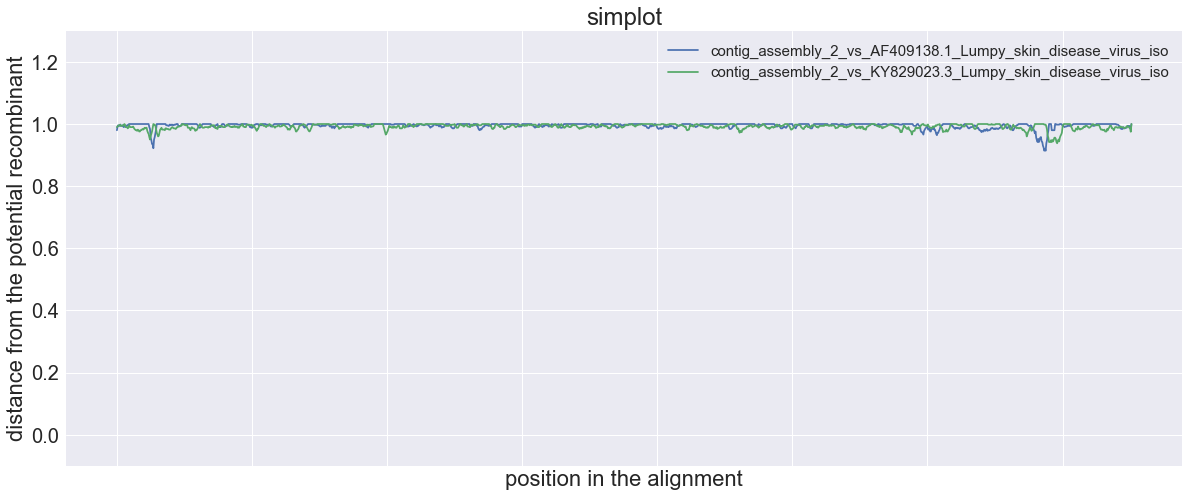

In [5]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2)

- whole alignment with shift and window arguments  :

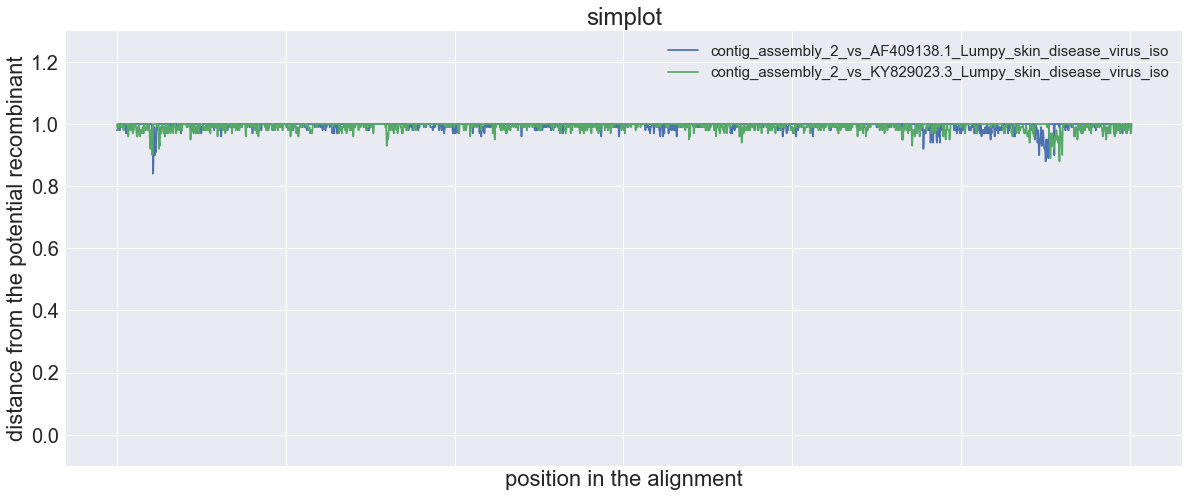

In [6]:
simgen("for_recan_lsdv_1.fasta", window=100, shift=50, pot_rec=2)

- here we take the slice :

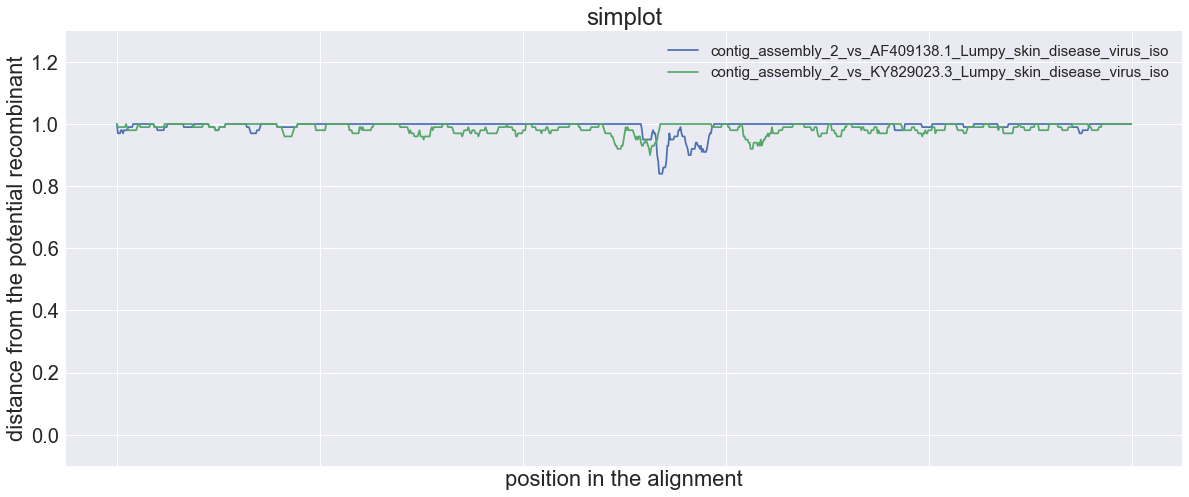

In [7]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2, window=100, shift=10, region=(0, 10000))

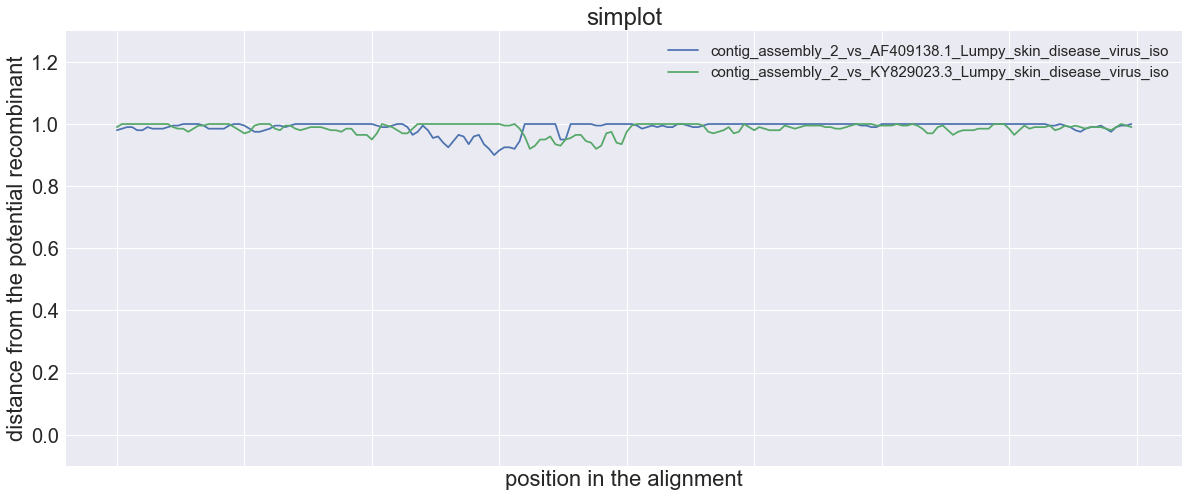

In [8]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2, window=200, shift=100, region=(130000, 150000))

- alignment with HBV sequences :

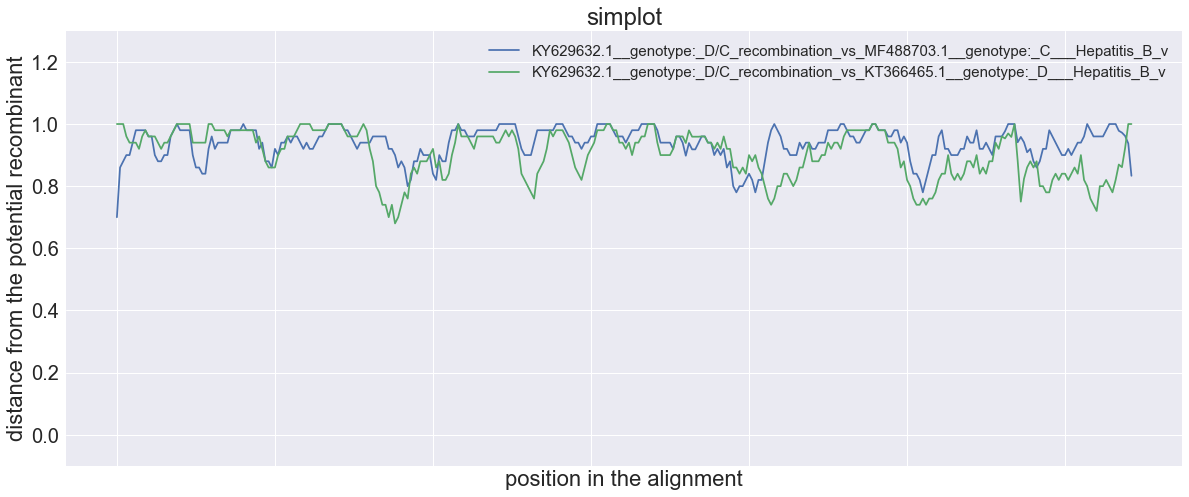

In [9]:
simgen("hbv.fasta", window=50, shift=10, pot_rec=2)

**a try to create plotly cool plot**

In [51]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [52]:
data = simgen("for_recan_lsdv.fasta", window=500, shift=100, pot_rec=2)

In [53]:
to_plot = []

for key in data.keys():
    trace = go.Scatter(y=data[key], x=list(range(1, len(data[key]))))
    to_plot.append(trace)

In [54]:
iplot(to_plot)


**trying to create function which will make plotly : **

In [62]:
def plotly_draw_simplot(distance_data, left_border, right_border, tick_container):
    """
    draws simplot
    takes distance_data from simgen
    """
    to_plot = []

    for key in distance_data.keys():
        trace = go.Scatter(y=distance_data[key], x=list(range(1, len(distance_data[key]))))
        to_plot.append(trace)
        
        
    layout = go.Layout(xaxis=dict(range=[left_border, right_border]))
    
    
    fig = go.Figure(data=to_plot, layout=layout)
    iplot(fig)
    
    print(tick_container)
    
    




**this function seems to work with data on the x-axis**

**NOTE: you can do the same tick container for plt**

In [67]:
def plotly_draw_simplot_1(distance_data, left_border, right_border, tick_container):
    """
    draws simplot
    takes distance_data from simgen
    """
    to_plot = []    
    

    for key in data.keys():
        trace = go.Scatter(y=distance_data[key], x=tick_container)
        to_plot.append(trace)
    
    
    iplot(to_plot)
        
    

In [70]:
simgen("for_recan_lsdv.fasta", window=500, shift=100, pot_rec=2)

In [73]:
simgen("for_recan_lsdv.fasta", window=500, shift=100, pot_rec=2, region=(1, 20000))